In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import cv2
import tensorflow.keras
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop,Adam
from tensorflow.keras.layers import Dropout,BatchNormalization,Input
from tensorflow.keras.losses import categorical_crossentropy

In [3]:
imgPath = []
path = "20-50/20-50/train/"
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        imgPath.append(os.path.join(dirname, filename)) # The file are dumped to imgpath.
imgPath = np.asarray(imgPath)  # Imgpath is converted to list array.
print(imgPath.shape)

(3947,)


In [4]:
print(imgPath)

['20-50/20-50/train/20\\122542.jpg' '20-50/20-50/train/20\\122550.jpg'
 '20-50/20-50/train/20\\122573.jpg' ... '20-50/20-50/train/50\\179588.jpg'
 '20-50/20-50/train/50\\179630.jpg' '20-50/20-50/train/50\\179652.jpg']


In [5]:
imgPath = np.core.defchararray.replace(imgPath,'\\', '/')

In [6]:
print(imgPath)

['20-50/20-50/train/20/122542.jpg' '20-50/20-50/train/20/122550.jpg'
 '20-50/20-50/train/20/122573.jpg' ... '20-50/20-50/train/50/179588.jpg'
 '20-50/20-50/train/50/179630.jpg' '20-50/20-50/train/50/179652.jpg']


In [7]:
imgShape = imgPath.shape[0]
print("imgShape: ",imgShape,type(imgShape))

imgShape:  3947 <class 'int'>


In [8]:
def loopsAndframe(imgShape,imgPath):
    
    # Empyt lists
    whatkindofimage = []                     
    imgName = []     
    Age =[]

    # For loop
    for i in range(0,imgShape):
        a = path.split("/")[2]       # We dynamically determine whether the test image or the train image.
        whatkindofimage.append(a)

        b = imgPath[i].split("/")[4] # The names of the images were determined from the path using the split method.
        imgName.append(b) 

        c = imgPath[i].split("/")[3] # The ages of the images were determined.
        Age.append(c)
    
    # Create data frame
    c1 = pd.Series(whatkindofimage)
    c2 = pd.Series(imgName)
    c3 = pd.Series(Age)
    c4 = pd.Series(imgPath)

    data_ = dict(whatkindofimage = c1,imgName = c2,Age = c3, imgPath = c4) # The created columns are added to the dataframe.
    df = pd.DataFrame(data_)
    return df

In [9]:
print("data = ", loopsAndframe(imgShape,imgPath).whatkindofimage[500])
print("image name =", loopsAndframe(imgShape,imgPath).imgName[500])
print("age =", loopsAndframe(imgShape,imgPath).Age[500])
print("Path = ",loopsAndframe(imgShape,imgPath).imgPath[500])

data =  train
image name = 160091.jpg
age = 25
Path =  20-50/20-50/train/25/160091.jpg


In [10]:
loopsAndframe(imgShape,imgPath).head()

,whatkindofimage,imgName,Age,imgPath
0,train,122542.jpg,20,20-50/20-50/train/20/122542.jpg
1,train,122550.jpg,20,20-50/20-50/train/20/122550.jpg
2,train,122573.jpg,20,20-50/20-50/train/20/122573.jpg
3,train,122642.jpg,20,20-50/20-50/train/20/122642.jpg
4,train,122646.jpg,20,20-50/20-50/train/20/122646.jpg


In [11]:
def imreading(images_index):    #  To read the images with the imread method, a method has been developed to get the index of the path in the name of imread,
    x = imgPath[images_index]   #  and read the photo in the desired index in array format.
    y = plt.imread(x)
    return y

In [12]:
import matplotlib.image as img

def imshowing(index):                # Defined a function to read images.
    x = imgPath[index]               # With determined index, the photo in the desired order in the path can be visualized.
    y = ("Age =",loopsAndframe(imgShape,imgPath).Age[index]) # the actual label of the image will be shown.
    z = (loopsAndframe(imgShape,imgPath).whatkindofimage[0],loopsAndframe(imgShape,imgPath).imgName[index])               
    k = img.imread(x) 
    plt.imshow(k)  
    plt.title(z)                     # The name of the image will be shown.
    plt.xlabel(y)
    plt.show()

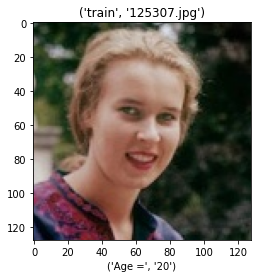

In [13]:
imshowing(50)

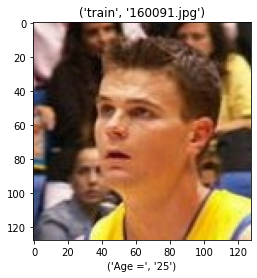

In [14]:
imshowing(500)

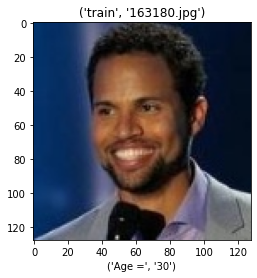

In [15]:
imshowing(1208)

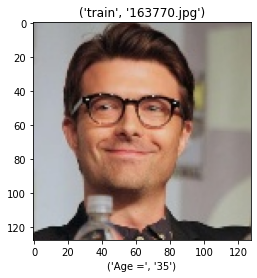

In [16]:
imshowing(1750)

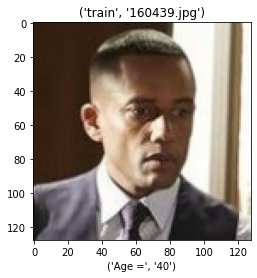

In [17]:
imshowing(2307)

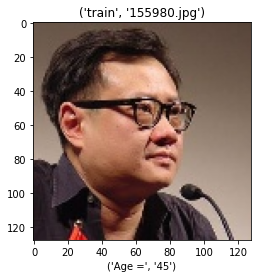

In [18]:
imshowing(2923)

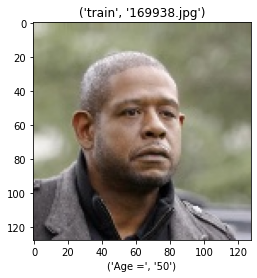

In [19]:
imshowing(3805)

In [13]:
# empty lists for arrays
model_img1 = []
model_img = []
model_age = []

for i in range(0,3947):                      
    a = imgPath[i]                           
    model_img1.append(a)                    # Creating images and labels with loop
    
    b = cv2.imread(model_img1[i])
    model_img.append(b)
    
    c = loopsAndframe(imgShape,imgPath)["Age"][i]
    d = cv2.imread(model_img1[i])
    model_age.append(int(c))
    
print("model_img",type(model_img[0]))
print("model_age",type(model_age[0]))

model_img <class 'numpy.ndarray'>
model_age <class 'int'>


In [15]:
model_img = np.asarray(model_img)
print(model_img.shape)

(3947, 128, 128, 3)


In [22]:
X = np.asarray(model_img)
X = X.reshape(-1,128,128,3).astype("float") # setting images entries for model
print(X.shape,type(X))

(3947, 128, 128, 3) <class 'numpy.ndarray'>


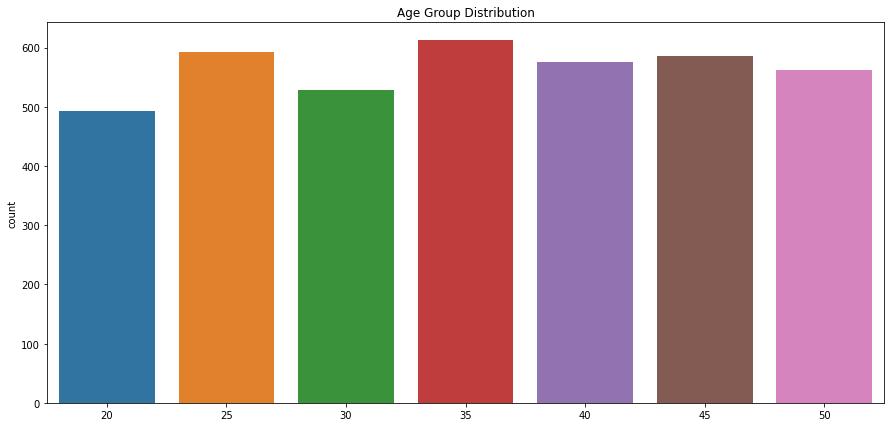

In [23]:
plt.figure(figsize=(15,7))
sns.countplot(model_age)
plt.title("Age Group Distribution")
plt.show()

In [24]:
Y = np.asarray(model_age).reshape(-1,1) #setting label entries for model
print(Y.shape,type(Y))

(3947, 1) <class 'numpy.ndarray'>


In [25]:
# normalization
X = X/255.0
Y = Y/255.0
print(X.shape)
print(Y.shape)

(3947, 128, 128, 3)
(3947, 1)


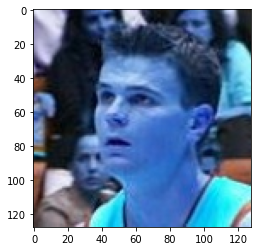

In [26]:
plt.imshow(X[500]) #view of the same image after normalization
plt.show()

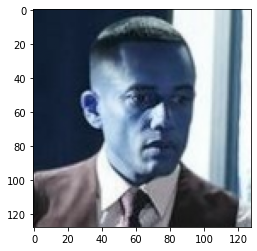

In [27]:
plt.imshow(X[2307])
plt.show()

In [28]:
from keras.utils.np_utils import to_categorical
Y = to_categorical(Y, num_classes = 7)
print(Y.shape)

Using TensorFlow backend.


(3947, 7)


In [30]:
from sklearn.model_selection import train_test_split
X_train,X_val,Y_train,Y_val = train_test_split(X,Y, test_size = 0.3,random_state = 50)
print("X_train.shape",X_train.shape)
print("X_val.shape",X_val.shape)
print("Y_train.shape",Y_train.shape)
print("Y_val.shape",Y_val.shape)

X_train.shape (2762, 128, 128, 3)
X_val.shape (1185, 128, 128, 3)
Y_train.shape (2762, 7)
Y_val.shape (1185, 7)


In [31]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rotation_range = 40,zoom_range = 0.3,width_shift_range=0.25,height_shift_range=0.25,
                             horizontal_flip = True,vertical_flip=False)
datagen.fit(X_train)

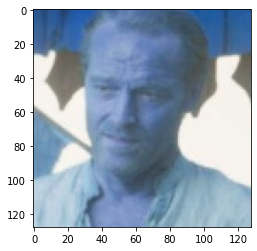

In [32]:
plt.imshow(X_train[500])
plt.show()

# Conv Nets

## Model 1 - 3 Layer CNN with ReLU

In [36]:
batch_size = 50
epochs = 5

In [35]:
model = Sequential()

model.add(Conv2D(64,(3, 3), activation='relu', input_shape = (128,128,3)))

model.add(Conv2D(64,(3, 3),activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,(3, 3),activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 126, 126, 64)      1792      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 124, 124, 64)      36928     
_________________________________________________________________
batch_normalization_4 (Batch (None, 124, 124, 64)      256       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 60, 60, 64)        36928     
_________________________________________________________________
batch_normalization_5 (Batch (None, 60, 60, 64)        256       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 30, 30, 64)       

In [37]:
history = model.fit(X_train,Y_train,batch_size = batch_size,
                    epochs = epochs, validation_data = (X_val,Y_val), steps_per_epoch = X_train.shape[0]// batch_size)

Epoch 1/5
55/55 [==============================] - 250s 4s/step - loss: 0.6185 - accuracy: 0.9142 - val_loss: 1.7759 - val_accuracy: 0.7688
Epoch 2/5
55/55 [==============================] - 286s 5s/step - loss: 0.0308 - accuracy: 0.9981 - val_loss: 12.3444 - val_accuracy: 0.3308
Epoch 3/5
55/55 [==============================] - 250s 5s/step - loss: 0.0854 - accuracy: 0.9972 - val_loss: 0.8190 - val_accuracy: 0.9536
Epoch 4/5
55/55 [==============================] - 233s 4s/step - loss: 0.0073 - accuracy: 0.9990 - val_loss: 5.8429 - val_accuracy: 0.7114
Epoch 5/5
55/55 [==============================] - 231s 4s/step - loss: 0.0172 - accuracy: 0.9992 - val_loss: 0.3268 - val_accuracy: 0.9705


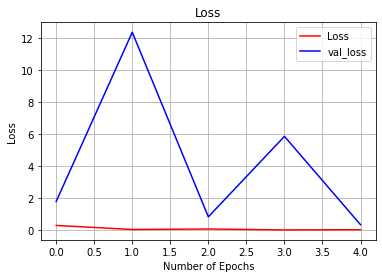

In [38]:
plt.plot(history.history['loss'], color='r', label="Loss")
plt.plot(history.history["val_loss"],color = "b",label = "val_loss")
plt.title("Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.grid()
plt.legend()
plt.show()

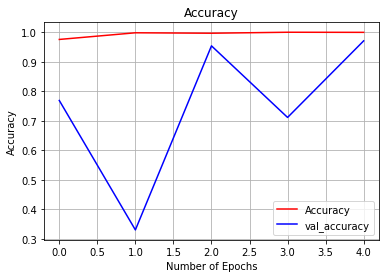

In [39]:
plt.plot(history.history['accuracy'], color='r', label="Accuracy")
plt.plot(history.history["val_accuracy"],color = "b",label = "val_accuracy")
plt.title("Accuracy")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.grid()
plt.legend()
plt.show()

## Model 2 - 3 Layer CNN with Sigmoid

In [40]:
model = Sequential()

model.add(Conv2D(64,(3, 3), activation='sigmoid', input_shape = (128,128,3)))

model.add(Conv2D(64,(3, 3),activation="sigmoid"))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,(3, 3),activation="sigmoid"))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 126, 126, 64)      1792      
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 124, 124, 64)      36928     
_________________________________________________________________
batch_normalization_6 (Batch (None, 124, 124, 64)      256       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 60, 60, 64)        36928     
_________________________________________________________________
batch_normalization_7 (Batch (None, 60, 60, 64)        256       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 30, 30, 64)       

In [41]:
history = model.fit(X_train,Y_train,batch_size = batch_size,
                    epochs = epochs, validation_data = (X_val,Y_val), steps_per_epoch = X_train.shape[0]// batch_size)

Epoch 1/5
55/55 [==============================] - 248s 4s/step - loss: 0.8491 - accuracy: 0.9271 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/5
55/55 [==============================] - 244s 4s/step - loss: 0.0229 - accuracy: 0.9995 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/5
55/55 [==============================] - 250s 5s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/5
55/55 [==============================] - 268s 5s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/5
55/55 [==============================] - 271s 5s/step - loss: 0.0069 - accuracy: 0.9996 - val_loss: 0.0000e+00 - val_accuracy: 1.0000


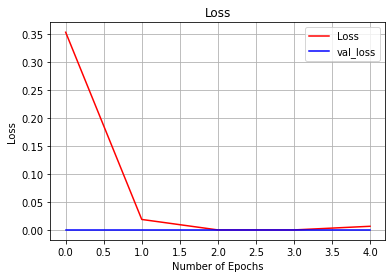

In [42]:
plt.plot(history.history['loss'], color='r', label="Loss")
plt.plot(history.history["val_loss"],color = "b",label = "val_loss")
plt.title("Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.grid()
plt.legend()
plt.show()

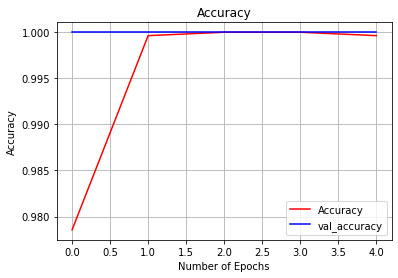

In [43]:
plt.plot(history.history['accuracy'], color='r', label="Accuracy")
plt.plot(history.history["val_accuracy"],color = "b",label = "val_accuracy")
plt.title("Accuracy")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.grid()
plt.legend()
plt.show()

## Model 3 - 3 Layer CNN with Tanh

In [44]:
model = Sequential()

model.add(Conv2D(64,(3, 3), activation='tanh', input_shape = (128,128,3)))

model.add(Conv2D(64,(3, 3),activation="tanh"))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,(3, 3),activation="tanh"))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 126, 126, 64)      1792      
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 124, 124, 64)      36928     
_________________________________________________________________
batch_normalization_8 (Batch (None, 124, 124, 64)      256       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 60, 60, 64)        36928     
_________________________________________________________________
batch_normalization_9 (Batch (None, 60, 60, 64)        256       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 30, 30, 64)       

In [45]:
history = model.fit(X_train,Y_train,batch_size = batch_size,
                    epochs = epochs, validation_data = (X_val,Y_val), steps_per_epoch = X_train.shape[0]// batch_size)

Epoch 1/5
55/55 [==============================] - 260s 5s/step - loss: 0.5669 - accuracy: 0.9181 - val_loss: 0.0059 - val_accuracy: 0.9983
Epoch 2/5
55/55 [==============================] - 260s 5s/step - loss: 0.0409 - accuracy: 0.9972 - val_loss: 0.0977 - val_accuracy: 0.9941
Epoch 3/5
55/55 [==============================] - 261s 5s/step - loss: 0.0435 - accuracy: 0.9982 - val_loss: 0.0095 - val_accuracy: 0.9992
Epoch 4/5
55/55 [==============================] - 262s 5s/step - loss: 0.0271 - accuracy: 0.9994 - val_loss: 0.1753 - val_accuracy: 0.9873
Epoch 5/5
55/55 [==============================] - 266s 5s/step - loss: 0.0255 - accuracy: 0.9995 - val_loss: 0.0000e+00 - val_accuracy: 1.0000


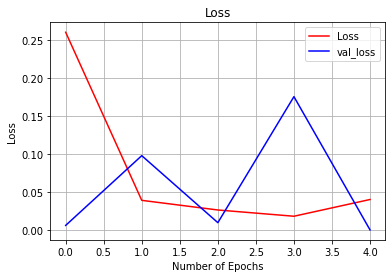

In [46]:
plt.plot(history.history['loss'], color='r', label="Loss")
plt.plot(history.history["val_loss"],color = "b",label = "val_loss")
plt.title("Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.grid()
plt.legend()
plt.show()

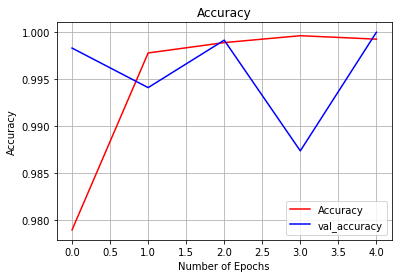

In [47]:
plt.plot(history.history['accuracy'], color='r', label="Accuracy")
plt.plot(history.history["val_accuracy"],color = "b",label = "val_accuracy")
plt.title("Accuracy")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.grid()
plt.legend()
plt.show()

## Model 4 - 5 Layer CNN with ReLU

In [26]:
model = Sequential()

model.add(Conv2D(64,(3, 3), activation='relu', input_shape = (128,128,3)))

model.add(Conv2D(64,(3, 3),activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,(3, 3),activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,(3,3),activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))

model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 124, 124, 64)      36928     
_________________________________________________________________
batch_normalization (BatchNo (None, 124, 124, 64)      256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 64)        36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 60, 60, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0

In [28]:
history = model.fit(X_train,Y_train,batch_size = batch_size,
                    epochs = epochs,
                    validation_data = (X_val,Y_val), steps_per_epoch = X_train.shape[0]// batch_size)

Epoch 1/5
71/71 [==============================] - 388s 5s/step - loss: 0.2482 - accuracy: 0.9401 - val_loss: 0.3376 - val_accuracy: 0.9848
Epoch 2/5
71/71 [==============================] - 361s 5s/step - loss: 2.3945e-07 - accuracy: 1.0000 - val_loss: 3.5058e-04 - val_accuracy: 1.0000
Epoch 3/5
71/71 [==============================] - 372s 5s/step - loss: 2.1987e-07 - accuracy: 1.0000 - val_loss: 4.8437e-07 - val_accuracy: 1.0000
Epoch 4/5
71/71 [==============================] - 370s 5s/step - loss: 2.3144e-07 - accuracy: 1.0000 - val_loss: 3.1085e-08 - val_accuracy: 1.0000
Epoch 5/5
71/71 [==============================] - 354s 5s/step - loss: 1.7638e-06 - accuracy: 1.0000 - val_loss: 9.7781e-08 - val_accuracy: 1.0000


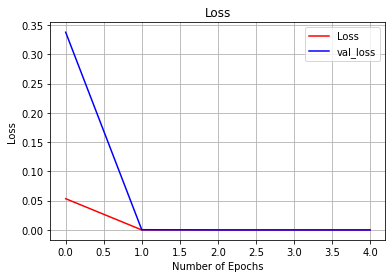

In [47]:
plt.plot(history.history['loss'], color='r', label="Loss")
plt.plot(history.history["val_loss"],color = "b",label = "val_loss")
plt.title("Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.grid()
plt.legend()
plt.show()

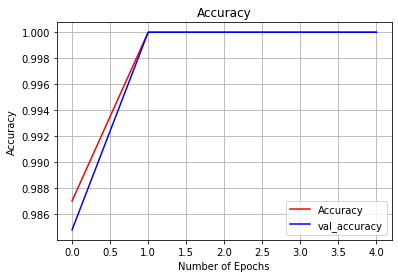

In [46]:
plt.plot(history.history['accuracy'], color='r', label="Accuracy")
plt.plot(history.history["val_accuracy"],color = "b",label = "val_accuracy")
plt.title("Accuracy")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.grid()
plt.legend()
plt.show()

## Model 5 - 5 Layer CNN with Sigmoid

In [54]:
model = Sequential()

model.add(Conv2D(128,(3, 3), activation='sigmoid', input_shape = (128,128,3)))

model.add(Conv2D(128,(3, 3),activation="sigmoid"))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128,(3, 3),activation="sigmoid"))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128,(3,3),activation="sigmoid"))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128,(3,3),activation="sigmoid"))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))

model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_46 (Conv2D)           (None, 126, 126, 128)     3584      
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 124, 124, 128)     147584    
_________________________________________________________________
batch_normalization_33 (Batc (None, 124, 124, 128)     512       
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 62, 62, 128)       0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 60, 60, 128)       147584    
_________________________________________________________________
batch_normalization_34 (Batc (None, 60, 60, 128)       512       
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 30, 30, 128)      

In [55]:
history = model.fit(X_train,Y_train,batch_size = batch_size,
                    epochs = epochs,
                    validation_data = (X_val,Y_val), steps_per_epoch = X_train.shape[0]// batch_size)

Epoch 1/5
71/71 [==============================] - 1192s 17s/step - loss: 0.2480 - accuracy: 0.9365 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/5
71/71 [==============================] - 1072s 15s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/5
71/71 [==============================] - 914s 13s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/5
71/71 [==============================] - 922s 13s/step - loss: 1.2177e-10 - accuracy: 1.0000 - val_loss: 4.9012e-07 - val_accuracy: 1.0000
Epoch 5/5
71/71 [==============================] - 918s 13s/step - loss: 1.9641e-10 - accuracy: 1.0000 - val_loss: 8.8124e-08 - val_accuracy: 1.0000


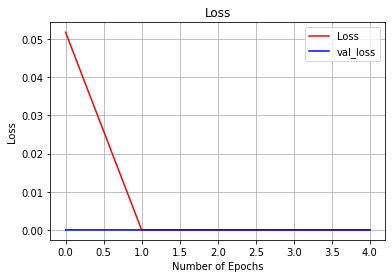

In [56]:
plt.plot(history.history['loss'], color='r', label="Loss")
plt.plot(history.history["val_loss"],color = "b",label = "val_loss")
plt.title("Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.grid()
plt.legend()
plt.show()

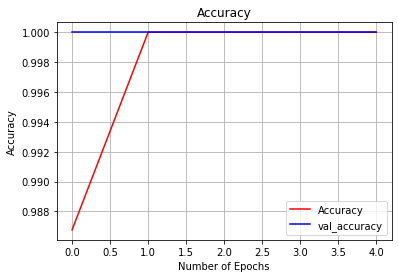

In [57]:
plt.plot(history.history['accuracy'], color='r', label="Accuracy")
plt.plot(history.history["val_accuracy"],color = "b",label = "val_accuracy")
plt.title("Accuracy")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.grid()
plt.legend()
plt.show()

## Model 6 - 5 Layer CNN with TanH

In [27]:
model = Sequential()

model.add(Conv2D(128,(3, 3), activation='tanh', input_shape = (128,128,3)))

model.add(Conv2D(128,(3, 3),activation="tanh"))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128,(3, 3),activation="tanh"))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128,(3,3),activation="tanh"))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128,(3,3),activation="tanh"))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))

model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 128)     3584      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 124, 124, 128)     147584    
_________________________________________________________________
batch_normalization (BatchNo (None, 124, 124, 128)     512       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 62, 62, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 128)       147584    
_________________________________________________________________
batch_normalization_1 (Batch (None, 60, 60, 128)       512       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 128)       0

In [30]:
history = model.fit(X_train,Y_train,batch_size = batch_size,
                    epochs = epochs,
                    validation_data = (X_val,Y_val), steps_per_epoch = X_train.shape[0]// batch_size)

Epoch 1/5
71/71 [==============================] - 1073s 15s/step - loss: 0.3156 - accuracy: 0.9312 - val_loss: 7.0017e-08 - val_accuracy: 1.0000
Epoch 2/5
71/71 [==============================] - 1077s 15s/step - loss: 0.0086 - accuracy: 0.9989 - val_loss: 3.0180e-09 - val_accuracy: 1.0000
Epoch 3/5
71/71 [==============================] - 1075s 15s/step - loss: 9.9713e-05 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/5
71/71 [==============================] - 1074s 15s/step - loss: 1.3927e-04 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/5
71/71 [==============================] - 1072s 15s/step - loss: 3.4774e-04 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000


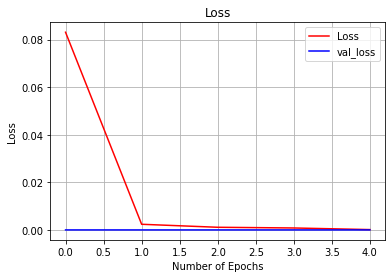

In [31]:
plt.plot(history.history['loss'], color='r', label="Loss")
plt.plot(history.history["val_loss"],color = "b",label = "val_loss")
plt.title("Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.grid()
plt.legend()
plt.show()

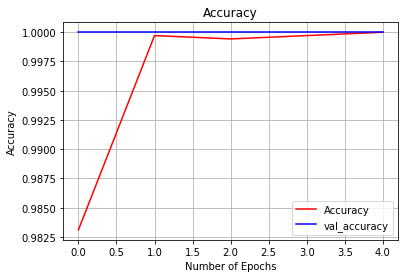

In [33]:
plt.plot(history.history['accuracy'], color='r', label="Accuracy")
plt.plot(history.history["val_accuracy"],color = "b",label = "val_accuracy")
plt.title("Accuracy")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.grid()
plt.legend()
plt.show()